# Twitter Sentiment Analysis

In [1]:
## Importing required libraries for data analysis and visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [3]:
## Importing warnings module to suppress any warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
## Setting pandas option to display all columns

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
## Importing wordcloud and STOPWORDS from wordcloud library

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
## Importing CountVectorizer, train_test_split, LogisticRegression and accuracy_score from scikit-learn library

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
## Importing XGBClassifier from xgboost library and LabelEncoder from scikit-learn library

In [12]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [13]:
## Importing regular expression and nltk library for text preprocessing

In [14]:
import re
import nltk
from nltk import word_tokenize

In [15]:
## Downloading stopwords from nltk library

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
## Overall, this code imports necessary libraries and modules to perform data analysis and visualization
## and machine learning model building. 
## It also suppresses any warning messages and sets pandas option to display all columns. 
## Additionally, it downloads stopwords from nltk library for text preprocessing.

In [20]:
train = pd.read_csv("twitter_training.csv")

In [21]:
 ## The first line reads a CSV file called "twitter_training.csv" and loads its contents into a pandas dataframe called "train"

In [22]:
train.columns = ['id','information','sentiment','text']

In [23]:
## The second line renames the columns of the "train" dataframe to ['id', 'information', 'sentiment', 'text']

In [24]:
train.head()

,id,information,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [26]:
## This line displays the first few rows of the "train" dataframe to check that the data
# was loaded and the column names were correctly assigned.


# Plotting Features


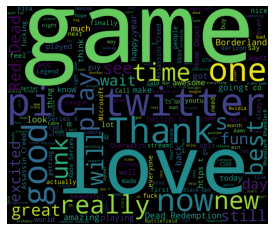

In [27]:
df1 = train[train['sentiment']=='Positive']

#This line of code filters the train DataFrame to only include rows where the 'sentiment' column is equal to 'Positive', 
#and assigns the resulting DataFrame to df1.


words = ' '.join(df1['text'].astype(str))

#This line of code creates a string words that concatenates all the text values in the 'text' column of the df1 DataFrame
#into a single string, 
# with each word separated by a space.


cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

#This line of code creates a new string cleaned_word that removes all the words that start with '@' from the words string using
# a list comprehension, and concatenates the remaining words into a single string.

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS, width=3000, height=2500).generate(''.join(cleaned_word))

#This line of code creates a WordCloud object wordcloud with a black background, using the STOPWORDS set to remove common words,
#and sets the size of the WordCloud image to 3000x2500 pixels.It then generates the WordCloud image using the generate() method,
#passing in the cleaned_word string.



plt.imshow(wordcloud)

#This line of code displays the WordCloud image generated in the previous line using the imshow() function 
#from the matplotlib.pyplot module.


plt.axis('off')

#This line of code removes the axis and tick marks from the WordCloud image using the axis() function.


plt.show()

#This line of code displays the WordCloud image on the screen using the show() function.


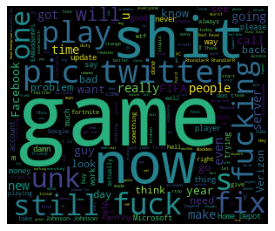

In [28]:
df2 = train[train['sentiment']=='Negative']

#This of code creates a new dataframe 'df2' that contains only the rows from the 'train' dataframe
#where the 'sentiment' column is equal to 'Negative'.


words = ' '.join(df2['text'].astype(str))

#This line of code joins all the text values in the 'text' column of the 'df2' dataframe 
#into a single string variable called 'words'.


cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

#This line of code uses a list comprehension to create a new string variable called 'cleaned_word'. 
#It splits the 'words' variable into individual words, and then checks if each word starts with an '@' symbol.
#If the word does not start with '@', it is added to 'cleaned_word'. This removes all Twitter user mentions from the text.


wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
width=300, height=250).generate(''.join(cleaned_word))

#The fourth line of code creates a wordcloud object called 'wordcloud'. The background color of 
#the wordcloud is set to black and the stopwords are set to a predefined set of stopwords called 'STOPWORDS'.
#The width and height of the wordcloud are also set.


plt.imshow(wordcloud)

#This line of code displays the wordcloud object using matplotlib's 'imshow' function.


plt.axis('off')

#This line of code removes the axis from the plot.


plt.show()

#This line of code displays the plot.


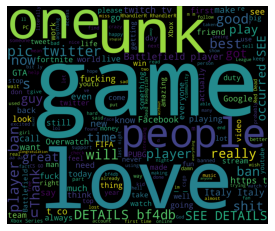

In [33]:
df3 = train[train['sentiment']=='Irrelevant']

#This code creates a new dataframe named "df3" by filtering the "train" dataframe for only the rows 
#where the "sentiment" column is equal to 'Irrelevant'.


words = ' '.join(df3['text'].astype(str))

#This code joins all the text in the "text" column of "df3" dataframe into a single string with spaces in between each word.


cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

#This code creates a new string "cleaned_word" by splitting the "words" string into individual words, filtering out any word 
#that starts with '@', and then joining the remaining words into a new string with spaces in between each word.


wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))

#This code creates a word cloud image using the "WordCloud" function from the "wordcloud" library. 
#The "background_color" parameter sets the color of the background of the image, the "stopwords" parameter is a set of words
#that will not be included in the word cloud, and the "width" and "height" parameters set the dimensions of the image.
#The "generate" method creates the word cloud using the "cleaned_word" string as input.


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#This code displays the word cloud image using the "imshow" function from the "matplotlib.pyplot" library.
#The "axis" function is used to turn off the display of the x and y axes on the image.
#The "show" function is used to display the image.

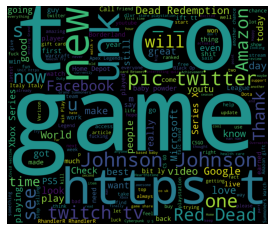

In [34]:
df4 = train[train['sentiment']=='Neutral']

#This line of code selects all rows from the 'train' dataframe where the 'sentiment' column has the value 'Neutral'
#and assigns the resulting dataframe to the variable 'df4'.


words = ' '.join(df4['text'].astype(str))

#The next line of code converts the 'text' column in the 'df4' dataframe to a string and concatenates all the strings
#into one long string, separated by spaces, and assigns the result to the variable 'words'.


cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

#The following line of code uses a list comprehension to create a new list of words from the 'words' string variable,
#filtering out all the words that start with the '@' character, and then concatenates the filtered words 
#into one long string separated by spaces, and assigns the result to the variable 'cleaned_word'.


wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))

#The next line of code creates a WordCloud object with a black background color and the English language stopwords 
#from the 'STOPWORDS' set, with a width of 3000 pixels and height of 2500 pixels, 
#and generates the WordCloud object from the 'cleaned_word' string.


plt.imshow(wordcloud)
plt.axis('off')

#The following line of code displays the generated WordCloud object as an image using the matplotlib library's 'imshow' function,
#and hides the axis using the 'axis' function.


plt.show()

#The last line of code displays the plot using the matplotlib library's 'show' function.

In [29]:
plot1=train.groupby(by=["information","sentiment"]).count().reset_index()

#This line of code groups the "train" dataframe by two columns: "information" and "sentiment"
#and counts the number of occurrences of each combination of values
#The result is then saved in a new dataframe called "plot1"


plot1.head()

#This line of code displays the first five rows of the "plot1" dataframe to the console




,information,sentiment,id,text
0,Amazon,Irrelevant,192,186
1,Amazon,Negative,576,575
2,Amazon,Neutral,1236,1207
3,Amazon,Positive,312,308
4,ApexLegends,Irrelevant,192,192


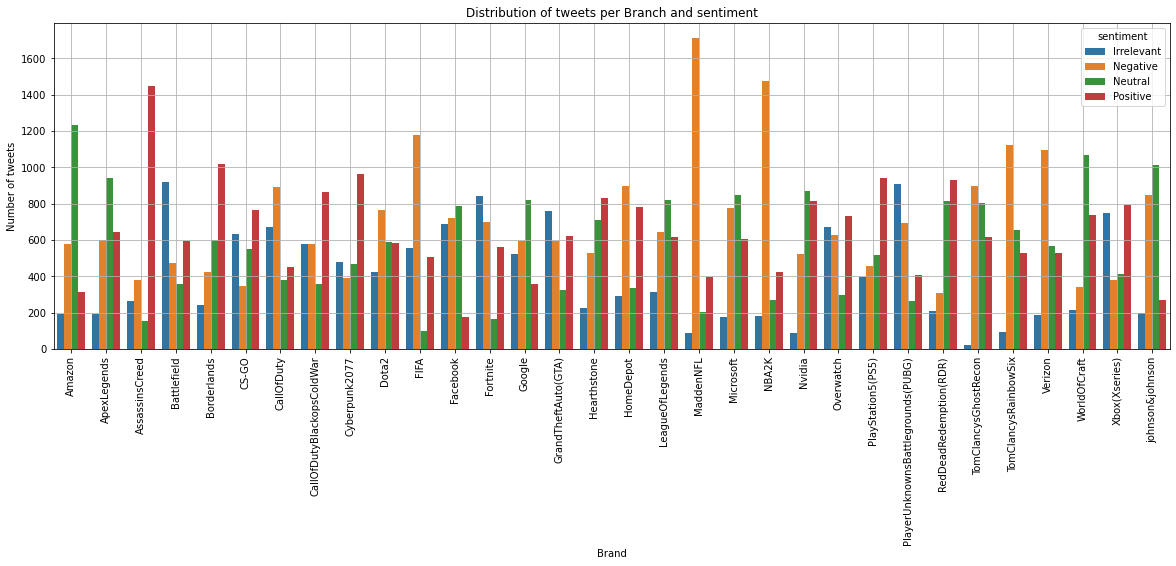

In [30]:
plt.figure(figsize=(20,6))

#This line creates a new plot figure with a width of 20 units and a height of 6 units.


sns.barplot(data=plot1,x="information",y="id",hue="sentiment")

#This line creates a bar plot using the data in plot1, where the "information" column is used for the x-axis,
#the "id" column is used for the y-axis, and the "sentiment" column is used to color the bars.


plt.xticks(rotation=90)

#This line rotates the x-axis tick labels by 90 degrees to improve readability.


plt.xlabel("Brand")
plt.ylabel("Number of tweets")

#These lines set the x-axis and y-axis labels respectively.


plt.grid()

#This line adds grid lines to the plot.


plt.title("Distribution of tweets per Branch and sentiment");

#This line sets the plot title to "Distribution of tweets per Branch and sentiment".
#The semicolon at the end is optional and just suppresses the output of the return value of the last function call.

# Data Preprocessing

In [37]:
import nltk

 # Importing the Natural Language Toolkit library
    
    
import re

 # Importing the regular expression library
    
    
from nltk.corpus import stopwords

 # Importing stopwords from the NLTK corpus

In [38]:
def tweet_to_words(tweet):

## Function definition, with 'tweet' as input argument.

    #Here, the regular expression is used to replace any character in the tweet that is not an English letter with a space. 
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    
    # Converting all the letters in 'letters_only' to lowercase and splitting it into words. The words are stored in a list.
    words = letters_only.lower().split()
    
    # 'stopwords' is a list of common English words that do not carry much meaning, such as 'a', 'an', 'the', etc. 
    # Using the stopwords module, the set of stopwords is created, to remove them from the tweet.
    stops = set(stopwords.words('english'))
    
    # Here, a list comprehension is used to get all the words in 'words' that are not in 'stops'.
    meaningful_word = [w for w in words if w not in stops]
    
    # Finally, the words in 'meaningful_word' are joined together to create a single string, separated by spaces.
    return ' '.join(meaningful_word)

In [39]:
def tweet_len(tweet):
## This function takes a single argument 'tweet', which is expected to be a string containing text of a tweet.

    # The re.sub() function is being used here to substitute any character which is not a letter(upper or lower case)with a space.
    #The '^' symbol inside square brackets means to match any character except the ones listed.
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    
    
    # The 'lower()' function is being used to convert all the letters of the string into lower case. 
    #The 'split()' function is then used to split the string into individual words, based on spaces between them.
    #The resulting words are stored in the 'words' variable.
    words = letters_only.lower().split()
    
    
    # The 'set()' function is used to create a set of stopwords from the 'english' language in this case.
    stops = set(stopwords.words('english'))
    
    
    # A list comprehension is being used here to create a new list 'meaningful_word' containing only those words
    #from the 'words' list which are not in the 'stops' set.
    meaningful_word = [w for w in words if w not in stops]
    
    
    # Finally, the length of the 'meaningful_word' list is returned as the output of this function.
    return (len(meaningful_word))

In [40]:
train['sentiments'] = train['sentiment'].apply(lambda x:0 if x=='negative' else 1)

#The following line of code creates a new column 'sentiments' in the 'train' dataframe.
#It applies a lambda function to each element in the 'sentiment' column, which sets the value to 0
#if the sentiment is 'negative' and 1 otherwise.


train['clean_tweet'] = train['text'].astype(str).apply(lambda x:tweet_to_words(x))

#The following line of code creates a new column 'clean_tweet' in the 'train' dataframe.
#It applies a lambda function to each element in the 'text' column, which calls the 'tweet_to_words' function
#to clean the tweet text.


train['tweet_length'] = train['text'].astype(str).apply(lambda x:tweet_len(x))

#This line of code creates a new column 'tweet_length' in the 'train' dataframe.
#It applies a lambda function to each element in the 'text' column, which calls the 'tweet_len' function to get 
#the length of the tweet text.


train_data, test_data = train_test_split(train,test_size=0.3,random_state=42)

#The following line of code splits the 'train' dataframe into training and testing data.
#It assigns 70% of the data to the training set and 30% to the testing set.
#The 'random_state' parameter ensures that the split is reproducible.

In [41]:
train_clean_tweet = []

#The following code is creating two empty lists: train_clean_tweet and test_clean_tweet.
#These lists will be used to store the clean versions of the tweets from the train_data and test_data dataframes.


for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []

# A for loop is used to iterate through each tweet in the 'clean_tweet' column of the train_data dataframe.
# The tweet is then appended to the train_clean_tweet list.


for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)
    
#Another for loop is used to iterate through each tweet in the 'clean_tweet' column of the test_data dataframe.
#The tweet is then appended to the test_clean_tweet list.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# This line imports the CountVectorizer class from the sklearn.feature_extraction.text module. 
# CountVectorizer is a tool used for feature extraction from text data.


v = CountVectorizer(analyzer='word')

#This line creates an instance of the CountVectorizer class and sets the analyzer parameter to 'word'. 
#The 'word' analyzer will treat each word in the text as a separate feature.


train_features = v.fit_transform(train_clean_tweet)

#This line uses the fit_transform method of the CountVectorizer instance to transform the training data (train_clean_tweet) into
# a matrix of features. The matrix is stored in the train_features variable.


test_features = v.transform(test_clean_tweet)

#This line uses the transform method of the CountVectorizer instance to transform the testing data (test_clean_tweet) into
# a matrix of features using the same vocabulary as the training data. The matrix is stored in the test_features variable.


# Model Building

In [44]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression is a linear model for classification.

from sklearn.neighbors import KNeighborsClassifier
# KNeighborsClassifier is a model that assigns classifications based on the k-nearest neighbors in a training dataset.

from sklearn.svm import SVC, LinearSVC, NuSVC
# SVC, LinearSVC, and NuSVC are models that use support vector machines for classification.

from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier is a model that uses a decision tree to assign classifications based on feature values.

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# RandomForestClassifier, AdaBoostClassifier, and GradientBoostingClassifier are ensemble methods that train multiple models 
#and combine their predictions to assign classifications.

from sklearn.naive_bayes import GaussianNB
# GaussianNB is a naive Bayes model that assumes Gaussian (normal) distribution of the features.


from sklearn.metrics import accuracy_score
# accuracy_score is a function that computes the accuracy of a classification model by comparing the predicted
#and true classifications for a dataset.

In [45]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='saga',max_iter=200),
    
    ## The first classifier is a logistic regression with a small regularization parameter C and a solver called 'saga' that
   # is suitable for large datasets.The maximum number of iterations is set to 200.
    
    
    KNeighborsClassifier(3),
    # The second classifier is a k-nearest neighbors classifier with k=3.
    
    DecisionTreeClassifier(),
    
    # The third classifier is a decision tree classifier that uses the default settings.
    
    
    RandomForestClassifier(n_estimators=200),
    
    # The fourth classifier is a random forest classifier with 200 decision trees.
    
    
    r(),
    
    # The fifth classifier is an AdaBoost classifier that uses the default settings.
    
    
    GaussianNB()]

    # The sixth classifier is a Gaussian naive Bayes classifier that uses the default settings.

In [46]:
dense_features=train_features.toarray()
#Converts the sparse training features to dense numpy array format.

dense_test= test_features.toarray()
#Converts the sparse testing features to dense numpy array format.

Accuracy=[]
Model=[]
#Creates two empty lists to store the accuracy and classifier names.

for classifier in Classifiers:
#Iterates through a list of classifier objects.

    try:
        fit = classifier.fit(train_features,train_data['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train_data['sentiment'])
        pred = fit.predict(dense_test)
# Attempts to fit the current classifier object to the training data using the sparse training features, and then predicts on 
# the sparse testing features. If an exception occurs, such as memory error, it fits to the dense training features and 
# predicts on the dense testing features.


    accuracy = accuracy_score(pred,test_data['sentiment'])
# Calculates the accuracy score of the classifier by comparing its predicted sentiment labels with the actual
# sentiment labels in the test dataset.

    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
# Appends the accuracy score and the name of the classifier to the respective lists.

    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy)) 
# Prints out the accuracy score and the name of the classifier.

Accuracy of LogisticRegressionis 0.297924570408391
Accuracy of KNeighborsClassifieris 0.8636018745815666
Accuracy of DecisionTreeClassifieris 0.8034367328721268
Accuracy of RandomForestClassifieris 0.897701405936175
Accuracy of AdaBoostClassifieris 0.4524882838652087
Accuracy of GaussianNBis 0.6830618165588038


In [47]:
result = pd.DataFrame({'Models':Model})

# This line creates a new pandas DataFrame called result with a single column called 'Models', 
# which is populated with the values in the Model variable.


result['Accuracy'] = Accuracy
#This line adds a new column to the DataFrame called "Accuracy", and fills it with the values from the variable Accuracy.


result = result.sort_values(by='Accuracy',ascending=False)

#This line sorts the result DataFrame by the values in the "Accuracy" column, in descending order (largest to smallest).
#The sorted DataFrame is then assigned back to the result variable.


result



,Models,Accuracy
3,RandomForestClassifier,0.897701
1,KNeighborsClassifier,0.863602
2,DecisionTreeClassifier,0.803437
5,GaussianNB,0.683062
4,AdaBoostClassifier,0.452488
0,LogisticRegression,0.297925
